In [1]:
library(tidyverse)
library(tidymodels)
library(tidyclust)
library(forcats)
library(repr)
options(repr.matrix.max.rows = 6)
source("cleanup.R")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

ERROR: Error in file(filename, "r", encoding = encoding): cannot open the connection


In [ ]:
#Part1 Data Wrangling and cleaning

In [4]:
data_game <- read_csv("dsci-100-student/players.csv")
data_game

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


In [5]:
data_game_2 <- select(data_game, experience, subscribe, played_hours)
data_game_2

experience,subscribe,played_hours
<chr>,<lgl>,<dbl>
Pro,TRUE,30.3
Veteran,TRUE,3.8
Veteran,FALSE,0.0
⋮,⋮,⋮
Amateur,FALSE,0.0
Amateur,FALSE,2.3
Pro,TRUE,0.2


In [7]:
data_game_3 <- data_game_2 |> mutate(experience = case_when(experience == "Pro" ~ 3, experience == "Veteran" ~ 2, experience == "Amateur" ~ 1), subscribe = ifelse(subscribe, 1, 0)) |> drop_na()
data_game_3$subscribe <- as.factor(data_game_3$subscribe)
data_game_3

experience,subscribe,played_hours
<dbl>,<fct>,<dbl>
3,1,30.3
2,1,3.8
2,0,0.0
⋮,⋮,⋮
1,0,0.0
1,0,2.3
3,1,0.2


In [6]:
# revised tidy data
players_summary <- data_game |>
                   group_by(experience,subscribe) |>
                   summarize(mean_time = mean(played_hours))
players_summary


`summarise()` has grouped output by 'experience'. You can override using the
`.groups` argument.


experience,subscribe,mean_time
<chr>,<lgl>,<dbl>
Amateur,FALSE,0.3666667
Amateur,TRUE,8.2777778
Beginner,FALSE,1.1750000
⋮,⋮,⋮
Regular,TRUE,22.5965517
Veteran,FALSE,0.5066667
Veteran,TRUE,0.7121212


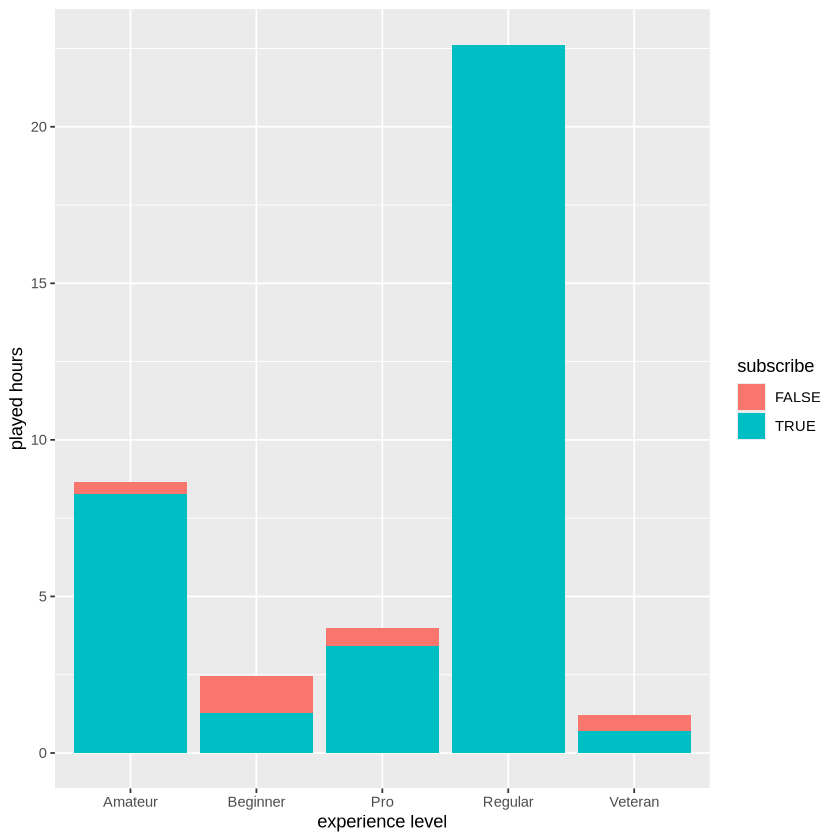

In [8]:
players_summary_plot <- ggplot(players_summary, aes(x = experience,y = mean_time, fill = subscribe)) +
                        geom_bar(stat = "identity") +
                        labs(x = "experience level", y = "played hours", color = "subscribe or not")
players_summary_plot

In [6]:
#Part2 Exploratory Data analysis (EDA)

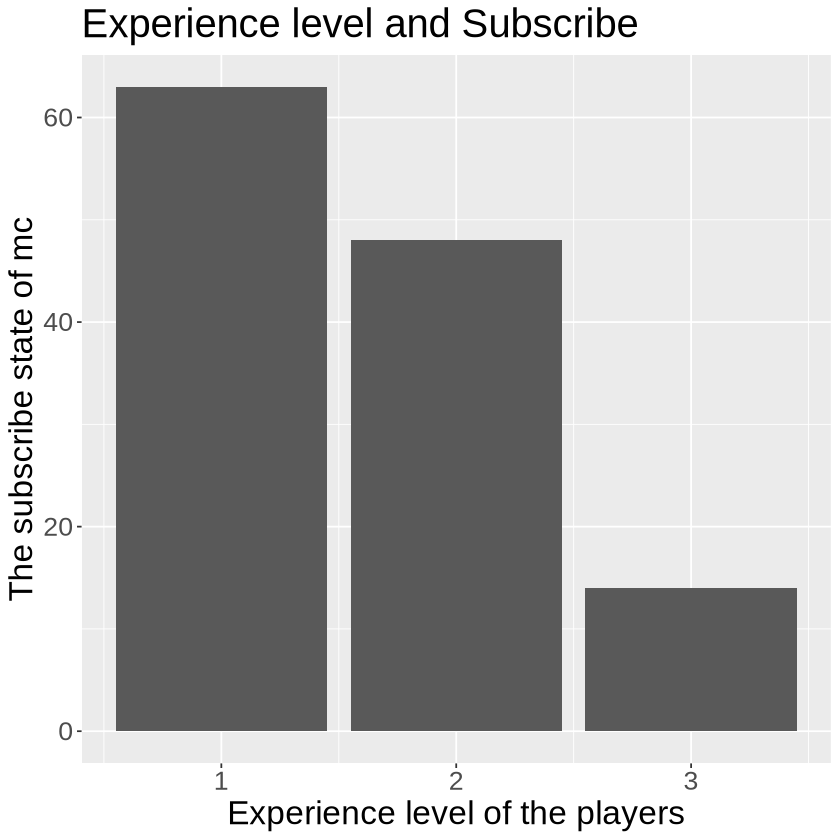

In [7]:
game_graph <- ggplot(data_game_3, aes(x = experience)) + geom_bar() + xlab("Experience level of the players") + ylab("The subscribe state of mc") + theme(text = element_text(size = 20)) + ggtitle("Experience level and Subscribe") + labs(fill = "Experience Level")
game_graph

In [8]:
# Modeling with KNN
# Since We are predicting a binary outcome, I will choose classification as amy tool to analysis my data and I will choose the KNN model to do the prediction.

In [9]:
set.seed(123)
data_split <- initial_split(data_game_3, prop = 0.8, strata = subscribe)
train_data <- training(data_split)
test_data  <- testing(data_split)
train_data
test_data

experience,subscribe
<dbl>,<fct>
2,0
1,0
1,0
⋮,⋮
1,1
1,1
3,1


experience,subscribe
<dbl>,<fct>
3,1
1,0
1,1
⋮,⋮
1,1
3,0
1,0


In [26]:
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>  
  set_engine("kknn") |>  
  set_mode("classification")
game_recipe <- recipe(subscribe ~ experience, data = train_data)
cv_folds <- vfold_cv(train_data, v = 5, strata = subscribe)
knn_results <- workflow() |>
  add_recipe(game_recipe) |>
  add_model(knn_spec) |> tune_grid(resamples = cv_folds, tibble(neighbors = c(3, 5, 7, 9))) |> collect_metrics()
accuracies <- knn_results |>
                 filter(.metric == 'accuracy')
accuracies

Warning message:
“The `...` are not used in this function but one or more objects were passed: ''”


neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
2,accuracy,binary,0.2898246,5,0.007788104,Preprocessor1_Model01
4,accuracy,binary,0.2898246,5,0.007788104,Preprocessor1_Model02
5,accuracy,binary,0.2898246,5,0.007788104,Preprocessor1_Model03
⋮,⋮,⋮,⋮,⋮,⋮,⋮
11,accuracy,binary,0.3120468,5,0.01058237,Preprocessor1_Model08
13,accuracy,binary,0.3009357,5,0.01082519,Preprocessor1_Model09
14,accuracy,binary,0.3009357,5,0.01082519,Preprocessor1_Model10


In [27]:
# mean is biggest when neighbors are equal to 5, so we choose 5 as the k value.

In [28]:
final_knn_spec <- nearest_neighbor(
  weight_func = "rectangular",
  neighbors = 5
) |>
  set_engine("kknn") |>
  set_mode("classification")

subscribe_recipe <- recipe(subscribe ~ experience, data = train_data) |>
  step_normalize(all_numeric_predictors())
final_workflow <- workflow() |>
  add_recipe(subscribe_recipe) |>
  add_model(final_knn_spec)

final_fit <- final_workflow |>
  fit(data = train_data)

test_predictions <- predict(final_fit, test_data) |>
  bind_cols(test_data)

metrics <- test_predictions |>
  metrics(truth = subscribe, estimate = .pred_class)

conf_matrix <- test_predictions |>
  conf_mat(truth = subscribe, estimate = .pred_class)
print(metrics)
print(conf_matrix)

# A tibble: 2 × 3
  .metric  .estimator .estimate
  <chr>    <chr>          <dbl>
1 accuracy binary         0.312
2 kap      binary         0    
          Truth
Prediction  0  1
         0 10 22
         1  0  0


In [29]:
data_game_4 <- select(data_game, experience, played_hours, subscribe)
data_game_4

experience,played_hours,subscribe
<chr>,<dbl>,<lgl>
Pro,30.3,TRUE
Veteran,3.8,TRUE
Veteran,0.0,FALSE
⋮,⋮,⋮
Amateur,0.0,FALSE
Amateur,2.3,FALSE
Pro,0.2,TRUE


In [24]:
data_game_5 <- data_game_4 |> mutate(experience = case_when(experience == "Pro" ~ 3, experience == "Veteran" ~ 2, experience == "Amateur" ~ 1), subscribe = ifelse(subscribe, 1, 0)) |> drop_na()
data_game_5$subscribe <- as.factor(data_game_3$subscribe)
data_game_5

experience,played_hours,subscribe
<dbl>,<dbl>,<fct>
3,30.3,1
2,3.8,1
2,0.0,0
⋮,⋮,⋮
1,0.0,0
1,2.3,0
3,0.2,1


In [90]:
set.seed(1234)
data_split_2 <- initial_split(data_game_5, prop = 0.85, strata = subscribe)
train_data_2 <- training(data_split_2)
test_data_2  <- testing(data_split_2)
train_data_2
test_data_2

experience,played_hours,subscribe
<dbl>,<dbl>,<fct>
1,0.0,0
1,0.0,0
1,0.1,0
⋮,⋮,⋮
1,0.0,1
1,0.0,1
3,0.2,1


experience,played_hours,subscribe
<dbl>,<dbl>,<fct>
2,0.0,0
1,0.1,1
1,1.8,1
⋮,⋮,⋮
2,0.0,0
1,32.0,1
1,2.3,0


In [91]:
knn_spec_2 <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>  
  set_engine("kknn") |>  
  set_mode("classification")
game_recipe_2 <- recipe(subscribe ~ experience + played_hours, data = train_data_2)
cv_folds_2 <- vfold_cv(train_data_2, v = 5, strata = subscribe)
knn_results_2 <- workflow() |>
  add_recipe(game_recipe_2) |>
  add_model(knn_spec_2) |> tune_grid(resamples = cv_folds_2, tibble(neighbors = c(1, 3, 5, 7, 9))) |> collect_metrics()
accuracies_2 <- knn_results_2 |>
                 filter(.metric == 'accuracy')
accuracies_2

Warning message:
“The `...` are not used in this function but one or more objects were passed: ''”


neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.4462771,5,0.04142194,Preprocessor1_Model01
3,accuracy,binary,0.4371861,5,0.06029374,Preprocessor1_Model02
4,accuracy,binary,0.4371861,5,0.06029374,Preprocessor1_Model03
⋮,⋮,⋮,⋮,⋮,⋮,⋮
11,accuracy,binary,0.6109524,5,0.07340751,Preprocessor1_Model08
13,accuracy,binary,0.6300000,5,0.06851850,Preprocessor1_Model09
14,accuracy,binary,0.6109524,5,0.07340751,Preprocessor1_Model10


In [92]:
biggest_mean <- accuracies_2 |> arrange(mean)
biggest_mean

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
3,accuracy,binary,0.4371861,5,0.06029374,Preprocessor1_Model02
4,accuracy,binary,0.4371861,5,0.06029374,Preprocessor1_Model03
1,accuracy,binary,0.4462771,5,0.04142194,Preprocessor1_Model01
⋮,⋮,⋮,⋮,⋮,⋮,⋮
11,accuracy,binary,0.6109524,5,0.07340751,Preprocessor1_Model08
14,accuracy,binary,0.6109524,5,0.07340751,Preprocessor1_Model10
13,accuracy,binary,0.6300000,5,0.06851850,Preprocessor1_Model09


In [88]:
#According to the mean colomn, the biggest mean is 0.6779532, so we choose neighbors = 13 as the k value.

In [93]:
final_knn_spec_2 <- nearest_neighbor(
  weight_func = "rectangular",
  neighbors = 13
) |>
  set_engine("kknn") |>
  set_mode("classification")

subscribe_recipe_2 <- recipe(subscribe ~ experience + played_hours, data = train_data_2) |>
  step_normalize(all_numeric_predictors())
final_workflow <- workflow() |>
  add_recipe(subscribe_recipe_2) |>
  add_model(final_knn_spec_2)

final_fit_2 <- final_workflow |>
  fit(data = train_data_2)

test_predictions_2 <- predict(final_fit_2, test_data_2) |>
  bind_cols(test_data_2)

metrics_2 <- test_predictions_2 |>
  metrics(truth = subscribe, estimate = .pred_class)

conf_matrix_2 <- test_predictions_2 |>
  conf_mat(truth = subscribe, estimate = .pred_class)
print(metrics_2)
print(conf_matrix_2)

# A tibble: 2 × 3
  .metric  .estimator .estimate
  <chr>    <chr>          <dbl>
1 accuracy binary         0.75 
2 kap      binary         0.306
          Truth
Prediction  0  1
         0  2  1
         1  4 13
